# Covariate experiment

by Catarina Fernandes


- input (1):  List of covariates (M simlarity matrixes)
- output (M): Verification and Identification experiment outputs


In [ ]:
%run verification_experiment.ipynb
%run identification_experiment.ipynb

In [3]:
import numpy as np 
from sklearn import metrics
from matplotlib import pyplot as plt

In [24]:
class CovariateExperiment():
    
    def __init__(self, covariates):
        for (distances_matrix, ground_truth) in covariates:
            if distances_matrix.shape[0] != distances_matrix.shape[1]:
                raise ValueError(f"The Distances Matrix dimension should be M x M, instead it is {distances_matrix.shape[0]} x {distances_matrix.shape[1]}")
            
            if distances_matrix.shape[0] != len(ground_truth) or ground_truth.ndim != 1:
                raise ValueError(f"The Ground Truth Array should have 1 x {distances_matrix.shape[0]} dimension, instead it has {ground_truth.ndim} x {len(ground_truth)}.")

            if not ((0 <= distances_matrix) & (distances_matrix <= 1)).all():
                raise ValueError("The values in the Distances Matrix should be between 0 and 1.")

            if not np.allclose(distances_matrix, distances_matrix.T):
                raise ValueError("The Distances Matrix should be symetric.")
        
        self.covariates = covariates

    def compute(self):
        verification_identification_list = []
        for (distances_matrix, ground_truth) in self.covariates:
            # Verification
            verif = VerificationExperiment(distances_matrix, ground_truth)
            verification_output = verif.compute()
            print(verification_output)

            # Identification
            ident = IdentificationExperiment(distances_matrix, ground_truth)
            identification_output = ident.compute()
            print(identification_output)

            verification_identification_list.append([verification_output,identification_output])
        return verification_identification_list

    @staticmethod
    def help(): 
        print("Covariate Experiment:\n Define CovariateExperiment instance by creating a variable and assigning it to CovariateExperiment(covariates).\n   - Parameter covariates is a M-dimensional list. Each covariate is made of a tuple of:\n    - distance_matrix should be a MxM array containing the distances between all M images. The values in the array should be between 0 and 1 and indicate the similarity between each image. \n    - ground_truth should be a 1xM array containing the classes of each image. \n\n After instancing a variable CovariateExperiment var, the method compute(self) can be called simply by running \"var.compute()\" which will return the results of the verification and identification experiments:\n - Verification:\n    - Equal error rate\n    - AUC (ROC)\n    - Verification @ 0.1% false acceptance rate\n    - ROC (vector plot)\n - Identification:\n    - C Vector of Ranks\n    - Cumulative Matching Characteristic curve\n")


In [25]:
CovariateExperiment.help()

Covariate Experiment:
 Define CovariateExperiment instance by creating a variable and assigning it to CovariateExperiment(covariates).
   - Parameter covariates is a M-dimensional list. Each covariate is made of a tuple of:
    - distance_matrix should be a MxM array containing the distances between all M images. The values in the array should be between 0 and 1 and indicate the similarity between each image. 
    - ground_truth should be a 1xM array containing the classes of each image. 

 After instancing a variable CovariateExperiment var, the method compute(self) can be called simply by running "var.compute()" which will return the results of the verification and identification experiments:
 - Verification:
    - Equal error rate
    - AUC (ROC)
    - Verification @ 0.1% false acceptance rate
    - ROC (vector plot)
 - Identification:
    - C Vector of Ranks
    - Cumulative Matching Characteristic curve



In [15]:
covariates = [
    (np.array([[1,0.9,0.3,0.1,0.2,0.1],[0.9,1,0.7,0.3,0.4,0.3],[0.3,0.7,1,0.1,0.8,0.1],[0.1,0.3,0.1,1,0.2,0.3],[0.2,0.4,0.8,0.2,1,0.4],[0.1,0.3,0.1,0.3,0.4,1]]),
    np.array(["A", "A", "B","B","C","C"])),
    (generate_test_dist_matrix(),
    np.array(["A","A","A", "A","B","B","B","B","C","C","C","C","D","D","D","D","E","E","E","E"]))
]

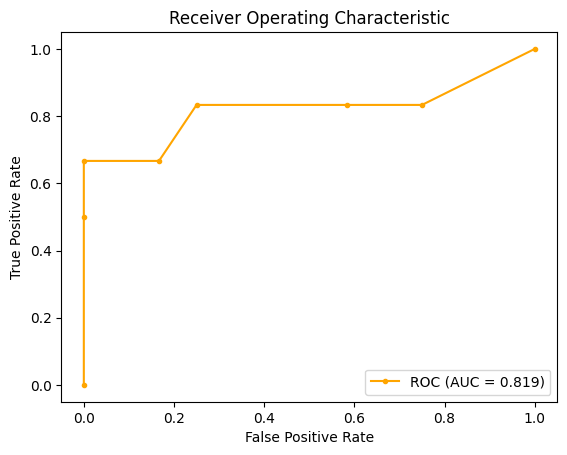

(0.20833333333333331, 0.8194444444444444, 0.6666666666666666)


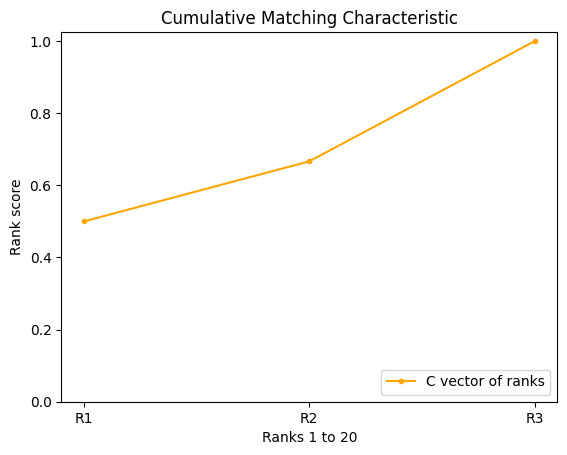

[0.5        0.66666667 1.        ]


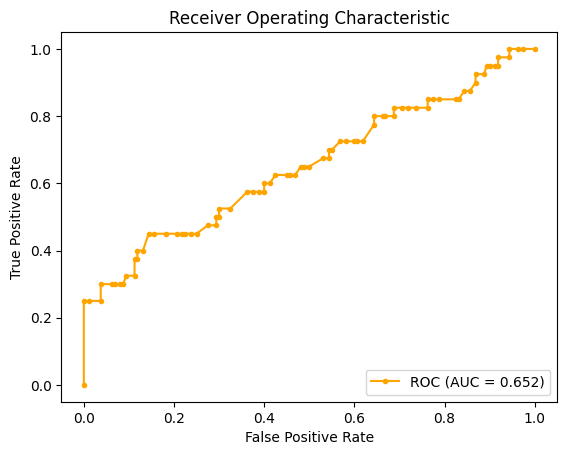

(0.4, 0.6520312500000001, 0.25)


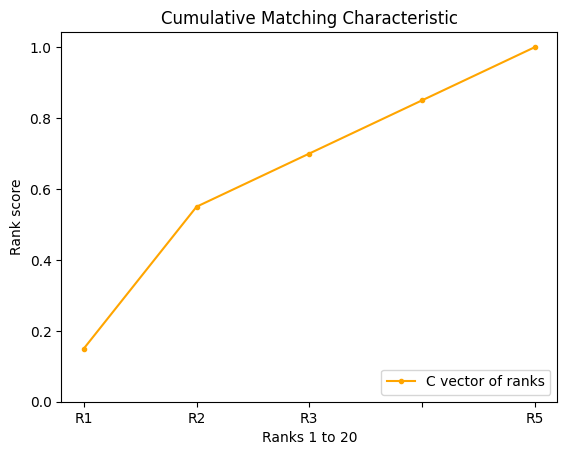

[0.15 0.55 0.7  0.85 1.  ]


In [17]:
test = CovariateExperiment(covariates)
results = test.compute()